In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
from mlxtend.data import loadlocal_mnist
import platform

## Train Data

In [3]:
x_train, y_train = loadlocal_mnist(images_path='data/mnist/train-images.idx3-ubyte',labels_path='data/mnist/train-labels.idx1-ubyte')

## Test Data

In [4]:
x_test, y_test = loadlocal_mnist(images_path='data/mnist/t10k-images.idx3-ubyte',labels_path='data/mnist/t10k-labels.idx1-ubyte')

In [5]:
print('Shape of x_train:',x_train.shape)
print('Shape of y_train:',y_train.shape)

Shape of x_train: (60000, 784)
Shape of y_train: (60000,)


In [6]:
print('Labels Train Data:',np.unique(y_train))
print('Labels Test Data:',np.unique(y_test))

Labels Train Data: [0 1 2 3 4 5 6 7 8 9]
Labels Test Data: [0 1 2 3 4 5 6 7 8 9]


`Scalling down the data`

In [7]:
x_train =x_train/255.0
x_test =x_test/255.0

`Visualizing 2 images of each class`

In [8]:
classes =  np.unique(y_test)
labels = classes.astype('int')
images = x_test.reshape(x_test.shape[0], 28, 28)

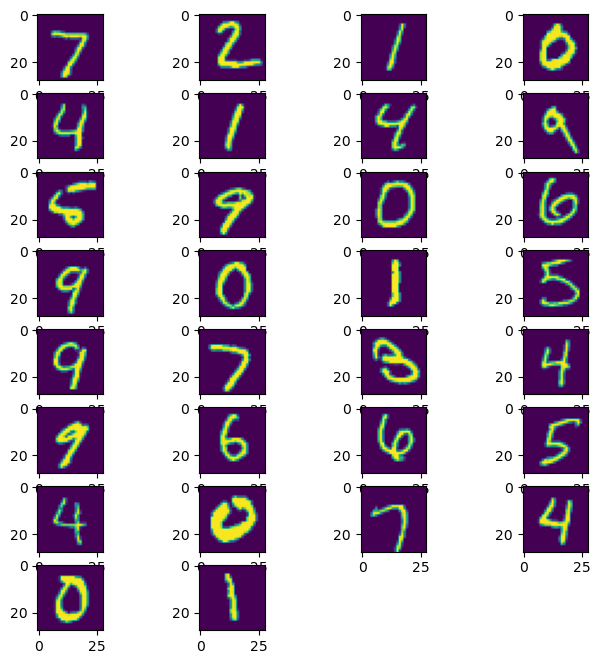

In [9]:
plt.figure(figsize=(8,8))
for i in range(30):
    plt.subplot(8,4,i+1)
    plt.imshow(images[i])

## One-Vs-Rest(OVR)

In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr',max_iter=2000)
model.fit(x_train, y_train)
yhat = model.predict(x_test)

In [11]:
from sklearn.metrics import classification_report
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.89      0.91      0.90      1010
           4       0.92      0.93      0.93       982
           5       0.89      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.93      0.93      1028
           8       0.87      0.87      0.87       974
           9       0.90      0.89      0.90      1009

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [12]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, yhat)
l = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(l)):
    print(f'Class {i} accuracy: {l[i]*100:.2f} %')

Class 0 accuracy: 97.86 %
Class 1 accuracy: 97.97 %
Class 2 accuracy: 89.15 %
Class 3 accuracy: 90.89 %
Class 4 accuracy: 93.18 %
Class 5 accuracy: 86.21 %
Class 6 accuracy: 94.68 %
Class 7 accuracy: 92.51 %
Class 8 accuracy: 87.27 %
Class 9 accuracy: 88.90 %


## One-Vs-One (OvO)

In [13]:
from sklearn.multiclass import OneVsOneClassifier
model_ovo = LogisticRegression(max_iter=2000)
ovo = OneVsOneClassifier(model_ovo)
ovo.fit(x_train, y_train)
y_pred = ovo.predict(x_test)

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       980
           1       0.98      0.99      0.98      1135
           2       0.94      0.94      0.94      1032
           3       0.92      0.93      0.93      1010
           4       0.95      0.96      0.95       982
           5       0.92      0.90      0.91       892
           6       0.95      0.96      0.96       958
           7       0.95      0.94      0.95      1028
           8       0.92      0.91      0.91       974
           9       0.93      0.92      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000



In [15]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
l = matrix.diagonal()/matrix.sum(axis=1)
for i in range(len(l)):
    print(f'Class {i} accuracy: {l[i]*100:.2f} %')

Class 0 accuracy: 97.96 %
Class 1 accuracy: 98.94 %
Class 2 accuracy: 93.51 %
Class 3 accuracy: 93.37 %
Class 4 accuracy: 96.13 %
Class 5 accuracy: 90.25 %
Class 6 accuracy: 96.14 %
Class 7 accuracy: 94.26 %
Class 8 accuracy: 90.86 %
Class 9 accuracy: 92.17 %
